<img src="images/house.jpg" width=400 height=400 />

#  Overview

This project analyzes the aspects of houses in order to reccommend renovations for a real estate office. Descriptive analysis of various aspects of house, such as how many sqft it is, how many floors, and how many bathrooms were used in a linear regression inferential anaylsis to find the highest correlation between the features. Our recommendation for the real estate office in renovating properties is to possibly expand the sqft of homes, including adding more bathrooms and bedrooms. 

# Business Problem

<img src="images/floorplan.jpg" width=400 height=400 />

The local real estate company wants to know what renovations improve the house prices in their King County. Inferential statistics of the data provided are depicted in order to aid the the real estate office in understanding the market value in local house renovations in comparison to others in order to recommend profitable renovations to their clients. 

# Data Understanding 

<img src="images/interiordesign.jpg" width=400 height=400 />

The data provided is csv file of many different aspects of homes in the area such as how many floors, bathrooms, bedrooms they contain. And also when they were built, renovated, and other aspects such as having a waterfront or a view. 

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns 
import operator
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
#load data
data = pd.read_csv('Data')

In [3]:
#inspect data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Column names
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Looking into description aspects for all features in the data set

In [6]:
data.groupby('bedrooms')['bedrooms'].count()

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

C:\Users\racha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


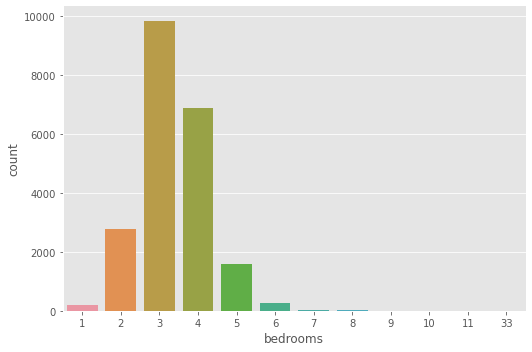

In [7]:
#Most houses in the area that the data set covers have 3 bedrooms
fg = sns.factorplot('bedrooms', data=data, kind='count', aspect=1.5)
fg.set_xlabels('bedrooms')

C:\Users\racha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


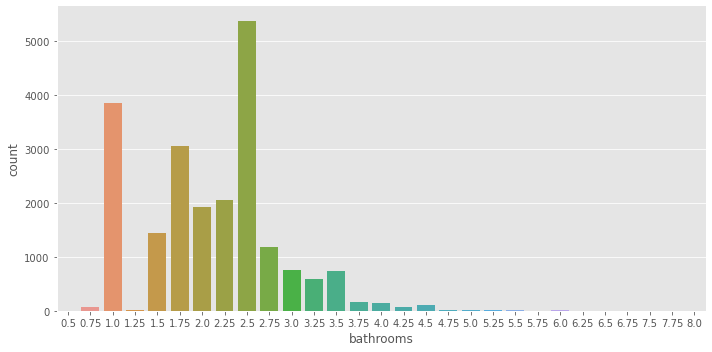

In [8]:
#Most houses in the area that the data set coversve 2.5 bathrooms
data.groupby('bathrooms')['bathrooms'].count()
fg = sns.factorplot('bathrooms', data=data, kind='count', aspect=2)
fg.set_xlabels('bathrooms')

In [9]:
#Most houses in the area that the data set covers do not have a view
data.groupby('waterfront')['waterfront'].count()


waterfront
NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
#Organizing the conditions in order of worst to best 
org_cond= ['Poor', 'Fair', 'Average','Good', 'Good condition', 'Very Good']

In [11]:
cond_sort = sorted(data['condition'], key=lambda x: org_cond.index(x))

C:\Users\racha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


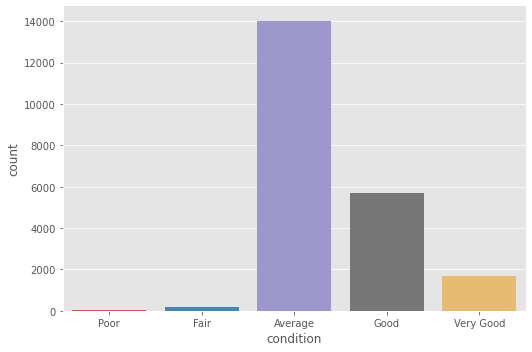

In [12]:
#Most houses in this area covered by the data set are described as in average condition. 
data.groupby('condition')['condition'].count()
fg = sns.factorplot(cond_sort, data=data, kind='count', aspect=1.5)
fg.set_xlabels('condition')

In [13]:
#Organizing the grades of the houses from worst to best
org_grade= ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']

In [14]:
grade_sort = sorted(data['grade'], key=lambda x: org_grade.index(x))

C:\Users\racha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


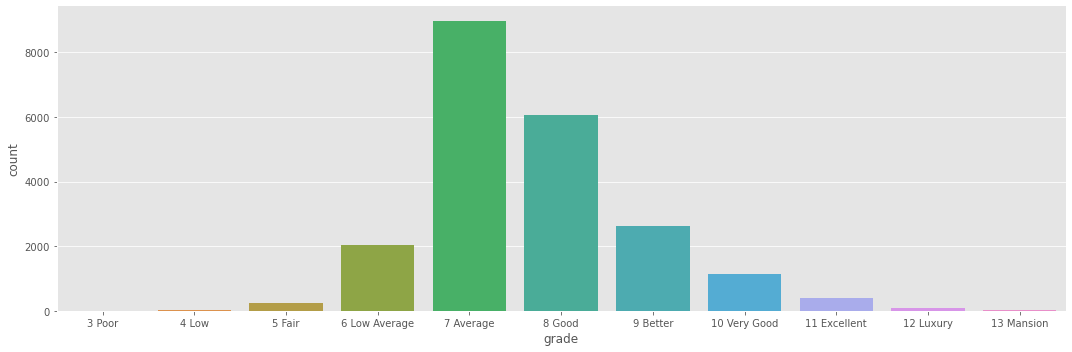

In [15]:
data.groupby('grade')['grade'].count()
fg = sns.factorplot(grade_sort, data=data, kind='count', aspect=3)
fg.set_xlabels('grade')

C:\Users\racha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


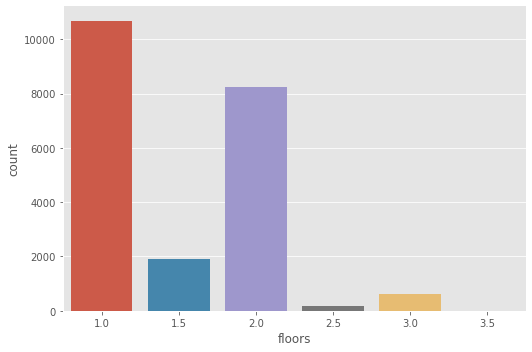

In [16]:
#Most houses in the area have either 1 or 2 floors and very few have 2.5 or 3
data.groupby('floors')['floors'].count()
fg = sns.factorplot('floors', data=data, kind='count', aspect=1.5)
fg.set_xlabels('floors')

# Data Preparation

To prepare the data for analysis I looked for any outliers or nan/null variables by first looking at visualizations. 

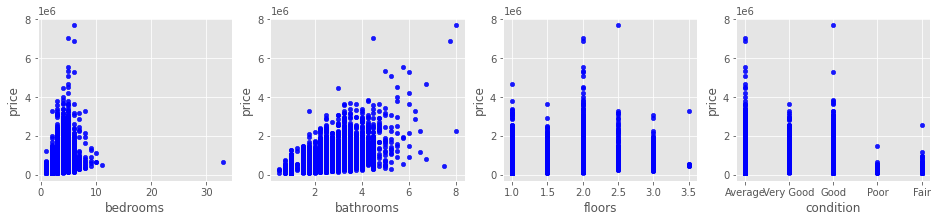

In [17]:
#there are outliers in bedrooms and bathrooms especially
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.9, color='b')

Now I will identify and remove the outliers by first showing a boxplot and then using interquartile percentages to determine exact outliers and use those to drop those data points the dependent variable, price. Along with dropping the outliers, I identifed any NAN or items of no value to also to remove from the data set in preparation of model building. 

In [18]:
data['price'].isna().sum()

0

C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

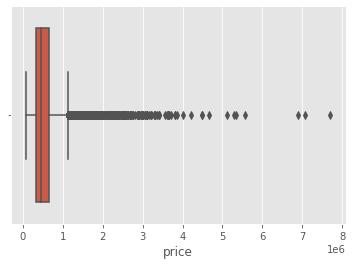

In [19]:
sns.boxplot(data['price'])

In [20]:
upper_limit = data['price'].quantile(0.99)
lower_limit = data['price'].quantile(0.01)

In [21]:
data2= data[(data['price']<= upper_limit) & (data['price'] >= lower_limit)]

C:\Users\racha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

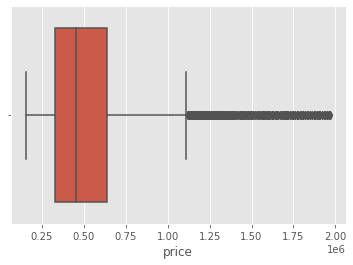

In [22]:
sns.boxplot(data2['price'])

In [23]:
data['price'].isna().sum()

0

In [24]:
data['bedrooms'].isna().sum()

0

In [25]:
print(data['bedrooms'].nunique())

12


In [26]:
data['bedrooms'].isna().sum()

0

In [27]:
print(data['bathrooms'].describe())

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


In [28]:
print(data['bathrooms'].nunique())

29


In [29]:
data2['bathrooms'].isna().sum()

0

In [30]:
print(data['sqft_above'].describe())

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64


In [31]:
print(data['sqft_living'].nunique())

1034


In [32]:
sqft_above_sample = data[data["sqft_living"].isna()]
sqft_above_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [33]:
data2['sqft_living'].isna().sum()

0

In [34]:
print(data['waterfront'].describe())

count     19221
unique        2
top          NO
freq      19075
Name: waterfront, dtype: object


In [35]:
waterfront_sample = data["waterfront"].isna()
waterfront_sample

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [36]:
data2['waterfront'].isna().sum()

2330

In [37]:
data2.dropna(subset=["waterfront"], inplace=True)

C:\Users\racha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
data2['waterfront'].isna().sum()

0

In [39]:
print(data2['view'].describe())

count     18783
unique        5
top        NONE
freq      17055
Name: view, dtype: object


In [40]:
view_sample = data2[data2["view"].isna()]
view_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,...,9 Better,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,...,7 Average,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,...,9 Better,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
590,2525069041,9/4/2014,505000.0,3,1.50,1830,217800,1.0,NO,NaN,...,7 Average,1010,820.0,1981,0.0,98053,47.6277,-121.972,2450,165963
938,1324079046,1/20/2015,350000.0,3,2.25,1580,47916,1.0,NO,NaN,...,7 Average,1580,0.0,1979,0.0,98024,47.5583,-121.852,1980,75358
1364,9468200140,8/19/2014,450000.0,2,1.75,1250,2890,1.0,NO,NaN,...,7 Average,790,460.0,1920,0.0,98103,47.6795,-122.353,1500,3225
1701,3121069036,12/8/2014,617000.0,3,1.75,3020,360241,2.0,NO,NaN,...,8 Good,3020,0.0,1992,0.0,98092,47.2662,-122.088,1890,209959
2415,8924100111,4/24/2015,699000.0,2,1.50,1400,4050,1.0,NO,NaN,...,8 Good,1400,0.0,1954,0.0,98115,47.6768,-122.269,1900,5940


In [41]:
data2.dropna(subset=["view"], inplace=True)

C:\Users\racha\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [42]:
data2['view'].isna().sum()

0

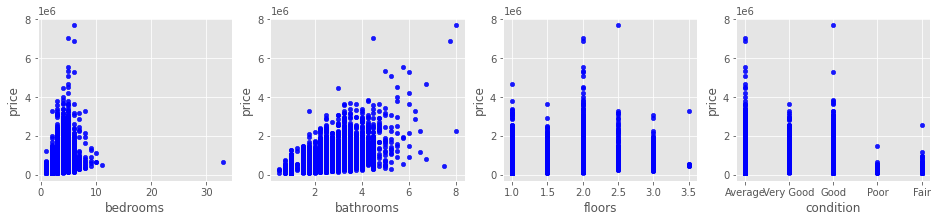

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.9, color='b')

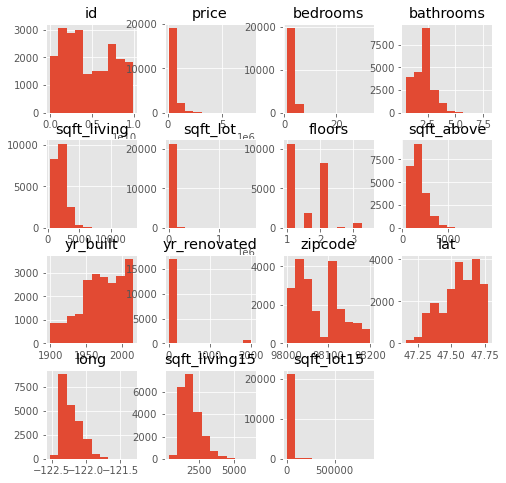

In [44]:
#depicting the variables a final time to ensure that they look as expected after preparation. 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax = ax);

## Finding the most correlated variables

In [45]:
#Create train and test groups to find most correlated feature
train = data.drop(['date', 'long', 'zipcode', 'yr_built', 'lat', "sqft_lot15"],axis =1)
test = data.drop (['date', 'long', 'zipcode', 'yr_built', 'lat',"sqft_lot15"], axis =1)

X_train = data2.drop(["price"], axis =1)
y_train = data2["price"]

X_test = data2.drop(["price"], axis=1)
y_test = data2["price"]


X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


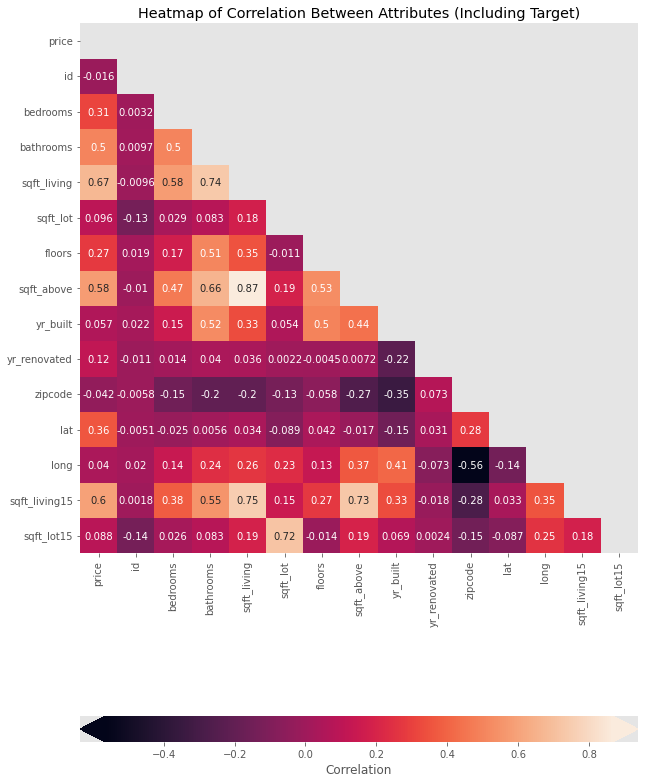

In [46]:
#visualization of correlation within the data set with price as the dependent variable

heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [47]:
#sqft_living and price have a correlation of 67% so it is the most correlated feature
most_correlated_feature = "sqft_living"

In [48]:
X_train[most_correlated_feature]

1        2570
2         770
3        1960
4        1680
5        5420
         ... 
21591    1310
21592    1530
21593    2310
21594    1020
21596    1020
Name: sqft_living, Length: 18783, dtype: int64

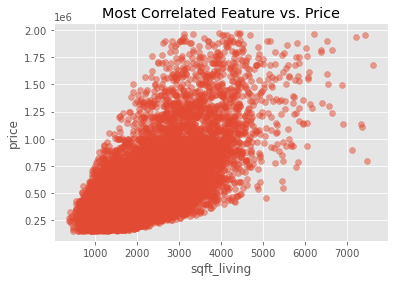

In [49]:
#there is a trend towards linearity and therefore is worth looking into this feature 
fig, ax = plt.subplots()

ax.scatter(data2[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Price");

# Data Analysis

Modeling a baseline model and then improving upon that.

In [50]:
#building a baseline model

In [51]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

Then I will evaluate the model using cross_validate and ShuffleSplit from the prepared data. 

In [52]:

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4514748794103558
Validation score: 0.45954078182078667


The R-squared scores are a little low with 45% of the variance in the dependent variable, 'price' explained. 

Now I will create a numeric version of the data that only contain the numeric data. 

In [53]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3,2.50,1310,1294,2.0,1180,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007


Now wewill look at plots of all the numeric features compared to price. 

IndexError: index 2 is out of bounds for axis 0 with size 2

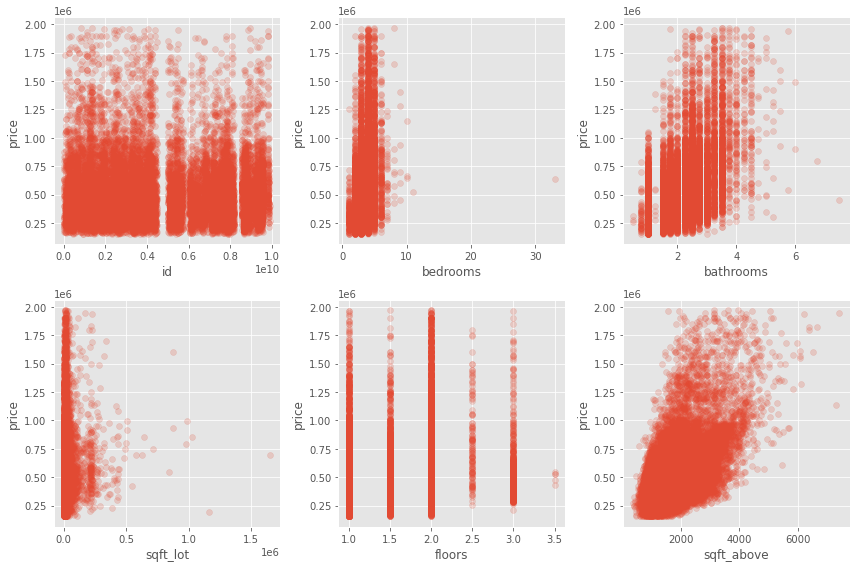

In [54]:

scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

Next I chose the features using logic and the plots above to drop from the data before creating the second model 

In [55]:
#Second model. Droping unecessary features to improve model
X_train_second_model= X_train_numeric.drop(["id",  "floors",'yr_built', 'yr_renovated', 'zipcode'], axis=1).copy()
X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15
1,3,2.25,2570,7242,2170,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,770,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1050,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1680,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,3890,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,1180,47.5773,-122.409,1330,1265
21592,3,2.50,1530,1131,1530,47.6993,-122.346,1530,1509
21593,4,2.50,2310,5813,2310,47.5107,-122.362,1830,7200
21594,2,0.75,1020,1350,1020,47.5944,-122.299,1020,2007


Below, I evaluate a model using X_train_second_model to see if there was any improvement over the baseline model after using the numeric data and dropping a few features. 

In [56]:
model2 = LinearRegression()

second_model_scores = cross_validate(
    estimator=model2,
    X=X_train_second_model,
    y=data2['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6055908936911432
Validation score: 0.6187241322493718

Baseline Model
Train score:      0.4514748794103558
Validation score: 0.45954078182078667


The second model shows an improvement in R-squared over the baseline model due to dropping the data that wasn't correlated well or did not have relavance to the business question. 

In [57]:
#summary of the regression results 
import statsmodels.api as sm
import statsmodels.formula.api as smf

regression_results = sm.OLS(y_train, sm.add_constant(X_train_second_model))

results = regression_results.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3248.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:24:05   Log-Likelihood:            -2.5370e+05
No. Observations:               18783   AIC:                         5.074e+05
Df Residuals:                   18773   BIC:                         5.075e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.763e+07   1.31e+06    -51.722

In [58]:
In order to see more results and some possible multicollinearity, I used OLS from StatsModels belowfor the x_train_second_model.

SyntaxError: invalid syntax (Temp/ipykernel_856/231123522.py, line 1)

In [59]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3248.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:24:06   Log-Likelihood:            -2.5370e+05
No. Observations:               18783   AIC:                         5.074e+05
Df Residuals:                   18773   BIC:                         5.075e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.763e+07   1.31e+06    -51.722      0.000   -7.02e+07   -6.51e+07
bedrooms      -2.669e+04   1769.886    -15.079      0.000   -3.02e+04   -2.32e+04
bathrooms      1.818e+04   2641.417      6.884      0.000     1.3e+04    2.34e+04
sqft_living     165.4399      3.864     42.818      0.000     157.867     173.013
sqft_lot          0.3067      0.046      6.624      0.000       0.216       0.397
sqft_above       13.7883      3.503      3.936      0.000       6.921      20.655
lat            6.431e+05   9532.592     67.467      0.000    6.24e+05    6.62e+05
long          -3.032e+05   1.05e+04    -28.913      0.000   -3.24e+05   -2.83e+05
sqft_living15   102.6391      3.115     32.953      0.000      96.534     108.744
sqft_lot15       -0.2489      0.069     -3.626      0.000      -0.383      -0.114
==============================================================================
Omnibus:                     5831.452   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26818.410
Skew:                           1.449   Prob(JB):                         0.00
Kurtosis:                       8.086   Cond. No.                     5.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The condition number is large and could mean that multicollinearity is present, so I will evaluate that for the model for that after improving it further. Below, I chose the significant features from the table above except 'lat' and 'long' because they are not aspects that can be renovated or improved on. 

In [60]:
significant_features = ["sqft_living", "bedrooms", "bathrooms", 'sqft_living', 'sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15']

In [61]:
#Created third model by singling out two significant features
model3 = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=model3,
    X=X_train_third_model,
    y=data2['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.48252682901928745
Validation score: 0.4916753352471033

Second Model
Train score:      0.6055908936911432
Validation score: 0.6187241322493718

Baseline Model
Train score:      0.4514748794103558
Validation score: 0.45954078182078667


The third model did not improve from the second model but is a slight improvement from the baseline model. In order to ensure that I am using the best features in my model I use Scikit-learn's feature_selection below.

In [62]:
#Using Sklearn to double check understanding of correlated features
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
sqft_above: True
lat: True
long: True
sqft_living15: True
sqft_lot15: True


Okay, it does agree that I've been using significant features in my models. Now I will use these significant features in model3 below

This is a custom code from the Flatiron Linear regression lab that goes over multiple different permutations of the columns, to see if we can find something better than the p-values approach or the RFECV approach.

In [63]:

from itertools import combinations

features = ["sqft_living","bedrooms", "bathrooms", 'sqft_lot', 'sqft_above','sqft_living15']

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=model2,
        X=X_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=model2,
        X=X_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Including all 3 additional features
results_df = results_df.append({
    "bedrooms": "Yes", "bathrooms": "Yes",'sqft_lot': "Yes", 'sqft_above': "Yes", 'sqft_living15': "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df

,sqft_living,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_living15,train_score,val_score
0,Yes,No,No,No,No,No,0.451475,0.459541
1,Yes,Yes,No,No,No,No,0.461510,0.468917
2,Yes,No,Yes,No,No,No,0.451489,0.459483
3,Yes,No,No,Yes,No,No,0.451974,0.460154
4,Yes,No,No,No,Yes,No,0.451558,0.459417
5,Yes,No,No,No,No,Yes,0.469803,0.479983
6,Yes,Yes,Yes,No,No,No,0.461780,0.469162
7,Yes,Yes,No,Yes,No,No,0.462521,0.470013
8,Yes,Yes,No,No,Yes,No,0.461817,0.468774
9,Yes,Yes,No,No,No,Yes,0.477340,0.486797


The best model shown here does include all of the features that I have been using, which is validating, it has a validation score of 0.609676. The worst model is listed as only using sqft_living as a feature and the validation score is 0.462971. 

In [64]:
X_train_3 = X_test[features]
X_test_3 = X_test[features]

In [65]:
#Final model using the three best features from other models and also the sklearn featue selection, 50% of the variance was covered.
model3 = LinearRegression()

# Fit the model on X_train_final and y_train
model3.fit(X_train_3, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
model3.score(X_test_3, y_test)

0.4829905309311362

In [66]:
#the Mean squared error is very high and results in low accuracy of prediction between the actual and predicted data set.
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, model3.predict(X_test_3), squared=False)

204357.19151576297

This means that for an average house in King County, this algorithm will be off by about $204137.

In [67]:
print(pd.Series(model3.coef_, index=X_train_3.columns, name="Coefficients"))
print()
print("Intercept:", model3.intercept_)

sqft_living        213.535050
bedrooms        -35655.569445
bathrooms        10463.905886
sqft_lot            -0.217278
sqft_above         -32.380432
sqft_living15       89.905595
Name: Coefficients, dtype: float64

Intercept: 63401.98394908151


According to our model, the base price for a house (the model intercept) is about $204137.

Then for each additional sqft_living, the price goes up by $ 214.

For each addition bedroom, the price goes down -35720, for each addition bathroom the price goes up $10603. 

For each additional sqft_lot and sqft_above the price goes down only slightly, and for each additional sqft_living15 the price goes up $90. 

Now we will investigate linearity to see if the model violates any assumptions. 

# Investigating Linearity 

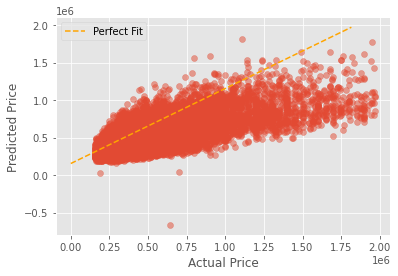

In [68]:
preds = model3.predict(X_test_3)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In general it looks like we have a slight linear relationship but not strong, could be violating this assumption. 

# Investigating Normality

In order to deter``mine if the normality close for linear regressions has been violated, a QQ_plot is shown below. 

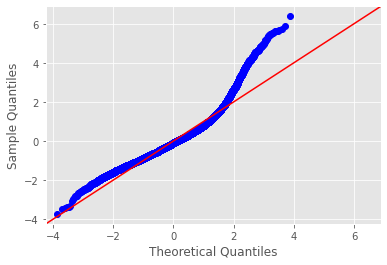

In [69]:
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Not a perfect fit, but close, I would say it is not violating this assumption. 

 # Investigating Multicollinearity (Independence Assumption)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
pd.Series(vif, index=X_train_3.columns, name="Variance Inflation Factor")

sqft_living      38.559132
bedrooms         13.915249
bathrooms        19.105061
sqft_lot          1.189188
sqft_above       25.949946
sqft_living15    19.305750
Name: Variance Inflation Factor, dtype: float64

It is above 5 except for sqft_lot, therefore many of the features are violating multicollinearity.

# Investigating Homoscedasticity

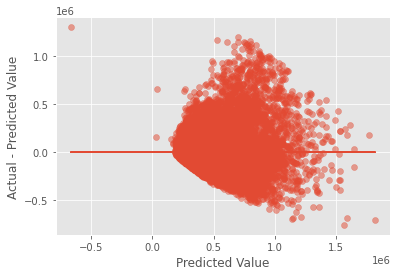

In [71]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

It is probably violating a strict definition of homoscedasticity due to the 'funnel' shape

Checking Multicollinearity : 

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
pd.Series(vif, index=X_train_3.columns, name="Variance Inflation Factor")

sqft_living      38.559132
bedrooms         13.915249
bathrooms        19.105061
sqft_lot          1.189188
sqft_above       25.949946
sqft_living15    19.305750
Name: Variance Inflation Factor, dtype: float64

 We are above 5 for all features except for sqft_lot and therefore can assume we have high multicollinearity

 # Categorical Dummy Variable model

Our confidence in these coefficients should not be too high, since we are violating or close to violating more than one of the assumptions of linear regression. This really only should be used for predictive purposes.

In [72]:
#Creating dummy variables for each categorical feature and using them in regression
price = y_train
sqft_living = X_train['sqft_living']
bathroom = X_train['bathrooms']
bedroom = X_train['bedrooms']

scaled_price = (price-min(price))/(max(price)-min(price))	

data_fin = pd.DataFrame([])
data_fin['price'] = scaled_price
waterfront_dummies = pd.get_dummies(X_train['waterfront'], prefix='cyl', drop_first=True)
view_dummies = pd.get_dummies(X_train['view'], prefix='yr', drop_first=True)

data_fin = pd.concat([price, data_fin, sqft_living, waterfront_dummies,view_dummies], axis=1)

In [73]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18783 entries, 1 to 21596
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         18783 non-null  float64
 1   price         18783 non-null  float64
 2   sqft_living   18783 non-null  int64  
 3   cyl_YES       18783 non-null  uint8  
 4   yr_EXCELLENT  18783 non-null  uint8  
 5   yr_FAIR       18783 non-null  uint8  
 6   yr_GOOD       18783 non-null  uint8  
 7   yr_NONE       18783 non-null  uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 678.7 KB


In [74]:
data_ols = pd.concat([price, sqft_living, waterfront_dummies,view_dummies, bathroom, bathroom], axis=1)
data_ols.head()

,price,sqft_living,cyl_YES,yr_EXCELLENT,yr_FAIR,yr_GOOD,yr_NONE,bathrooms,bathrooms
1,538000.0,2570,0,0,0,0,1,2.25,2.25
2,180000.0,770,0,0,0,0,1,1.00,1.00
3,604000.0,1960,0,0,0,0,1,3.00,3.00
4,510000.0,1680,0,0,0,0,1,2.00,2.00
5,1230000.0,5420,0,0,0,0,1,4.50,4.50


In [75]:
formula = 'price ~ sqft_living + waterfront_dummies + view_dummies + bathroom + bedroom'
model4 = ols(formula=formula, data=data_ols).fit()

In [76]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [77]:
#Unforunately this model with the dummies variables did not have a large R-squared and is therefore not a good model
model4 = ols(formula=formula, data=data_ols)

results = model4.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     2627.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:25:26   Log-Likelihood:            -2.5611e+05
No. Observations:               18783   AIC:                         5.122e+05
Df Residuals:                   18775   BIC:                         5.123e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.865e+05   8706.719     21.422   

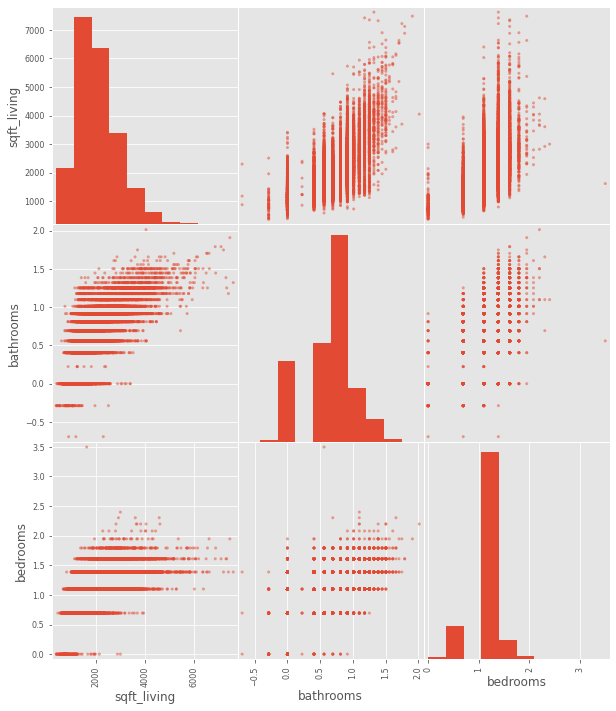

In [81]:
non_normal = ['bathrooms', 'bedrooms',]
for feat in non_normal:
    X_train[feat] = X_train[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(X_train[x_cols], figsize=(10,12));

## Discussing my final models

The model with the highest proportion of the variance for a dependent variable that's explained by an independent variable was the second model, with a R-squared of .609, in which building upon the base model helped in raising the variance explained a little. 

The R-squared score is in a range in which we can be confident in recommending these aspects to the King County real estate office in order to increase profit in resales. The features are the addition of sqft_living, bathrooms,and bedrooms.

However, the moel hey did not pass all of the normally distributed data tests, QQ-plots, homoscedasticity, and predicted points against actual points. So we must be careful of multicollinearity. 